# 0.0 IMPORTS

## 0.0 Helper Functions

In [4]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
import inflection
import math

## 0.0 Loading data

In [5]:
df_sales_raw = pd.read_csv('datasets/train.csv', low_memory=False)
df_store_raw = pd.read_csv('datasets/store.csv', low_memory=False)

# merge (Unindo os arquivos a partir do store, coluna comun aos dois arquivoc, a fim de montar um tabelão com os dados de venda e as características da loja. LEmbre-se da união de tabelas no SQL)

df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store' )

In [6]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
824859,545,6,2013-06-22,6959,753,1,0,0,0,a,c,5020.0,5.0,2006.0,1,18.0,2014.0,"Feb,May,Aug,Nov"


# 0.1 DESCRIÇÃO DOS DADOS

In [7]:
# Cópia do DF - neste caso o meigraom fez pois não precisar rodar o código completo se der algum erro, apenas a seção
df1 = df_raw.copy()

## 1.1 Rename Columns

In [8]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 
            'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 
            'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

# Renomeando as colunas com a função lambda

snakecase = lambda x: inflection.underscore(x)
# map vai mapear a função snakecase em todas as palavras da lista cols_old
cols_new = list ( map( snakecase, cols_old ) )

# rename 
df1.columns = cols_new

## 1.2 Data Dimensions

In [9]:
print('Number of Rows: {}'.format (df1.shape[0]))
print('Number of Columns: {}'.format (df1.shape[1]))

Number of Rows: 1017209
Number of Columns: 18


## 1.3 Data Types

In [10]:
# alterando o tipo da coluna data de object para date
df1['date'] = pd.to_datetime( df1 ['date'] )

df1.dtypes


store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [11]:
# somando as linhas vazias

df_raw.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

## 1.5 Fillout NA

In [12]:
# competition_distance: distancia até um competidor          
# max_value 20000 if math.isna(df1['competition_distance']) else df1 ['competition_distance'] - raciocínio
df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan(x) else x )

# competition_open_since_month: data da última competição. Para os NA's copiar data da última venda
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month']) else x['competition_open_since_month'], axis=1 )

# competition_open_since_year   
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year']) else x['competition_open_since_year'], axis=1 )
                       
# promo2_since_week: data da continuidade da última promoção
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week']) else x['promo2_since_week'], axis=1 )

# promo2_since_year     
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year']) else x['promo2_since_year'], axis=1 )

# promo_interval: intervalo de meses em que apromoção 2 foi ativa. A ideia é criar uma coluna auxiliar dizendo sim ou não.
month_map = { 1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec' }

df1['promo_interval'].fillna( 0 , inplace=True )

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval','month_map']].apply (lambda x: 0 if x['promo_interval'] ==0 else 1 if x['month_map'] in x['promo_interval'].split ( ',' ) else 0, axis=1 )

In [13]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

In [14]:
df1.sample(10).T

,540826,156289,572639,685012,672209,715764,386218,875014,331345,709340
store,837,190,315,73,650,720,293,525,634,986
day_of_week,2,5,1,5,3,6,4,3,7,5
date,2014-03-04 00:00:00,2015-03-13 00:00:00,2014-02-03 00:00:00,2013-10-25 00:00:00,2013-11-06 00:00:00,2013-09-28 00:00:00,2014-07-24 00:00:00,2013-05-08 00:00:00,2014-09-21 00:00:00,2013-10-04 00:00:00
sales,5428,7232,6209,5151,5848,5405,4889,10191,0,6931
customers,642,647,603,537,601,665,707,936,0,1030
open,1,1,1,1,1,1,1,1,0,1
promo,1,0,1,1,1,0,0,0,0,0
state_holiday,0,0,0,0,0,0,0,0,0,0
school_holiday,0,0,0,0,0,0,1,0,0,0
store_type,a,a,a,a,a,a,c,d,d,a


## 1.6 Change Types

In [15]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )

df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

## 1.7 Descriptive Statistical

In [16]:
# Separando as colunas númericas
num_attributes = df1.select_dtypes( include=[ 'int64', 'float64'])
cat_attributes = df1.select_dtypes( exclude=[ 'int64', 'float64', 'datetime64[ns]'])

## 1.7.1 Numerical Attributes

In [17]:
# Central Tendence
ct1 = pd.DataFrame( num_attributes.apply ( np.mean) ).T
ct2 = pd.DataFrame( num_attributes.apply ( np.median) ).T

# Dispercion: std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply ( np.std) ).T
d2 = pd.DataFrame( num_attributes.apply (min) ).T
d3 = pd.DataFrame( num_attributes.apply (max) ).T
d4 = pd.DataFrame( num_attributes.apply (lambda x: (x.max() - x.min()) ) ).T
d5 = pd.DataFrame( num_attributes.apply (lambda x: x.skew () ) ).T
d6 = pd.DataFrame( num_attributes.apply (lambda x: x.kurtosis () ) ).T


#Concatenate
m = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index()
m.columns = [ 'atributes','min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,atributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


/tmp/ipykernel_2095/420894260.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df1['sales'])


<Axes: xlabel='sales', ylabel='Density'>

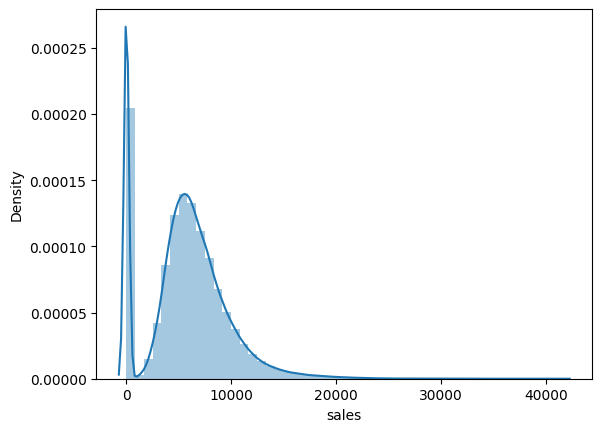

In [18]:
sns.distplot( df1['sales'])

## 1.7.2 Categorical Attributes

In [19]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

/tmp/ipykernel_2095/2018994300.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')  # Ajuste de rotação
/tmp/ipykernel_2095/2018994300.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')  # Ajuste de rotação
/tmp/ipykernel_2095/2018994300.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')  # Ajuste de rotação
/tmp/ipykernel_2095/2018994300.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[3].set_xticklabels(axes[3].get_x

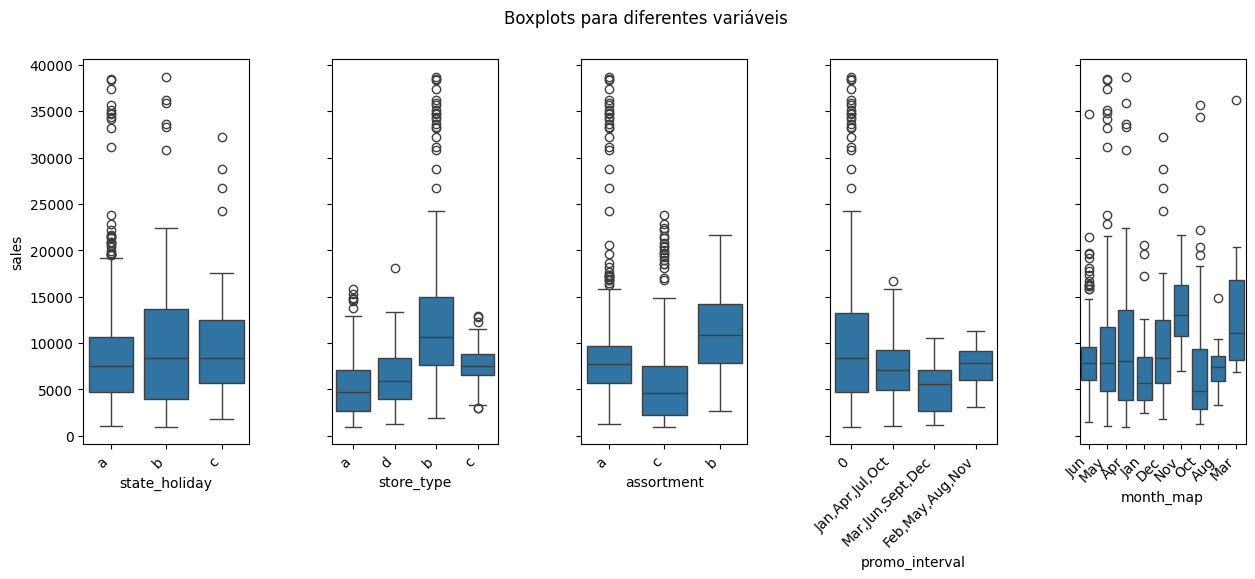

In [46]:
# Filtrando o dataset
aux1 = df1[(df1['state_holiday'] != '0' ) & (df1['sales'] > 0 )]

# Configuração do subplot
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

# Ajusta o espaço entre os subplots
plt.subplots_adjust(wspace=0.5)

# Boxplots
sns.boxplot(x='state_holiday', y='sales', data=aux1, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')  # Ajuste de rotação

sns.boxplot(x='store_type', y='sales', data=aux1, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')  # Ajuste de rotação

sns.boxplot(x='assortment', y='sales', data=aux1, ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')  # Ajuste de rotação

sns.boxplot(x='promo_interval', y='sales', data=aux1, ax=axes[3])
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=45, ha='right')  # Ajuste de rotação

sns.boxplot(x='month_map', y='sales', data=aux1, ax=axes[4])
axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation=45, ha='right')  # Ajuste de rotação

# Ajusta o título do subplot
plt.suptitle('Boxplots para diferentes variáveis')

# Exibe o gráfico
plt.show()
